Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats

## Exploring the Data

In [37]:
df = pd.read_csv('Batting_play_2.csv')

In [38]:
df.head(10)

,playerID,yearID,salary,stint,teamID,franchID,franchName,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,bethach01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,48,155,...,12,1,1,5,33,1,0,0,0,7
1,centeju01,2015,507500.0,1,MIL,MIL,Milwaukee Brewers,NL,10,21,...,0,0,0,2,7,0,0,0,0,0
2,cunnito01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,39,86,...,4,2,1,5,17,1,2,0,0,1
3,gomezhe01,2015,507500.0,1,MIL,MIL,Milwaukee Brewers,NL,66,127,...,7,0,0,3,40,0,2,2,0,1
4,gosseph01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,20,40,...,2,2,0,2,5,0,0,0,0,0
5,gosseph01,2015,507500.0,2,ARI,ARI,Arizona Diamondbacks,NL,24,66,...,13,0,1,7,11,0,2,0,1,2
6,mccanja02,2015,507500.0,1,DET,DET,Detroit Tigers,AL,114,401,...,41,0,1,16,90,0,3,4,1,17
7,peterja01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,152,528,...,52,12,10,56,120,4,3,7,3,5
8,rogerja02,2015,507500.0,1,MIL,MIL,Milwaukee Brewers,NL,86,152,...,16,0,0,15,34,0,2,0,0,2
9,terdojo01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,28,56,...,4,0,0,3,14,1,0,0,0,1


In [39]:
#subset of my data 
df_2 = df.loc[:,['salary','lgID','R','H','HR','RBI','SB','SO']]

In [40]:
df_2.head(10)

,salary,lgID,R,H,HR,RBI,SB,SO
0,507500.0,NL,16,31,2,12,1,33
1,507500.0,NL,0,1,0,0,0,7
2,507500.0,NL,13,19,0,4,2,17
3,507500.0,NL,15,23,1,7,0,40
4,507500.0,NL,2,13,0,2,2,5
5,507500.0,NL,17,20,3,13,0,11
6,507500.0,AL,32,106,7,41,0,90
7,507500.0,NL,55,126,6,52,12,120
8,507500.0,NL,22,45,4,16,0,34
9,507500.0,NL,5,12,1,4,0,14


In [41]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
salary    426 non-null float64
lgID      649 non-null object
R         649 non-null int64
H         649 non-null int64
HR        649 non-null int64
RBI       649 non-null int64
SB        649 non-null int64
SO        649 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 40.6+ KB


I am going to drop the null values in salary, as the data set does not contain the salary for all listed players. 

In [42]:
df_2 = df_2[df_2['salary'].notnull()][['salary','lgID','R','H','HR','RBI','SB','SO']]

In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 8 columns):
salary    426 non-null float64
lgID      426 non-null object
R         426 non-null int64
H         426 non-null int64
HR        426 non-null int64
RBI       426 non-null int64
SB        426 non-null int64
SO        426 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 30.0+ KB


In [44]:
#convert numerics to float
for col in df_2.loc[:,'R':'SO'].columns:
    df_2[col]= df_2[col].astype(float)

In [45]:
# Descriptive statistics for my outcome variable, salary
print(df_2['salary'].describe())


count    4.260000e+02
mean     4.939774e+06
std      5.864819e+06
min      5.075000e+05
25%      5.254430e+05
50%      2.500000e+06
75%      6.889286e+06
max      2.500000e+07
Name: salary, dtype: float64


In [46]:
#I am going to convert salary into thousands for clarity
df_2.loc[:,'salary'] = round((df_2['salary'] /10**3),2)

In [47]:
print(df_2['salary'].describe())

count      426.000000
mean      4939.773897
std       5864.819167
min        507.500000
25%        525.440000
50%       2500.000000
75%       6889.285000
max      25000.000000
Name: salary, dtype: float64


In [48]:
df_2.describe()

,salary,R,H,HR,RBI,SB,SO
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,4939.773897,39.241784,79.704225,9.455399,37.467136,4.859155,65.169014
std,5864.819167,28.821401,55.446524,9.446525,28.894617,7.769253,42.667354
min,507.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,525.440000,13.000000,27.000000,2.000000,11.250000,0.000000,29.000000
50%,2500.000000,36.000000,73.000000,6.000000,33.500000,2.000000,63.000000
75%,6889.285000,60.750000,127.000000,15.000000,58.000000,6.000000,97.750000
max,25000.000000,122.000000,205.000000,44.000000,130.000000,58.000000,187.000000


In [49]:
#lets remove rows with sum of values is 0

df_3 = df_2.loc[df_2.loc[:,['R','H','HR','RBI','SB','SO']].sum(axis=1)!=0,:]

In [50]:
df_3.shape

(422, 8)

In [51]:
df_3.describe()

,salary,R,H,HR,RBI,SB,SO
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,4975.725308,39.613744,80.459716,9.545024,37.822275,4.905213,65.786730
std,5880.354068,28.701843,55.159730,9.446014,28.798739,7.791555,42.391816
min,507.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,525.440000,14.000000,28.250000,2.000000,12.000000,0.000000,29.000000
50%,2500.000000,36.000000,73.500000,7.000000,34.000000,2.000000,63.000000
75%,6900.000000,61.750000,128.500000,15.000000,58.000000,6.000000,98.000000
max,25000.000000,122.000000,205.000000,44.000000,130.000000,58.000000,187.000000


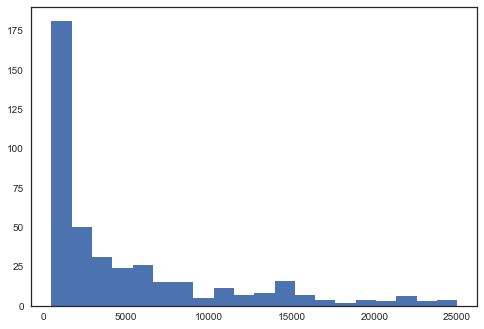

In [52]:
plt.hist(df_3['salary'], bins=20)
plt.show()

There is clearly a right skew to this distribution, 

#### Which of my variables are continuous vs categorical

In [53]:
#uqniue values for each variable
for col in df_3.columns: 
    print('There are {} unique values for {}'.format((len(df[col].unique())),col))

There are 206 unique values for salary
There are 2 unique values for lgID
There are 105 unique values for R
There are 175 unique values for H
There are 41 unique values for HR
There are 106 unique values for RBI
There are 34 unique values for SB
There are 145 unique values for SO


In [54]:
df_3.describe()

,salary,R,H,HR,RBI,SB,SO
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,4975.725308,39.613744,80.459716,9.545024,37.822275,4.905213,65.786730
std,5880.354068,28.701843,55.159730,9.446014,28.798739,7.791555,42.391816
min,507.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,525.440000,14.000000,28.250000,2.000000,12.000000,0.000000,29.000000
50%,2500.000000,36.000000,73.500000,7.000000,34.000000,2.000000,63.000000
75%,6900.000000,61.750000,128.500000,15.000000,58.000000,6.000000,98.000000
max,25000.000000,122.000000,205.000000,44.000000,130.000000,58.000000,187.000000


The count and the describe function (which does not include categorical variables) leads me to believe it is likely that I am only dealing with one categorical variables, the team name. Salary, Runs, Hits, Home Runs, RBIs, Stolen Bases, and Strike Outs are continuous.

#### Examining Continuous Variables

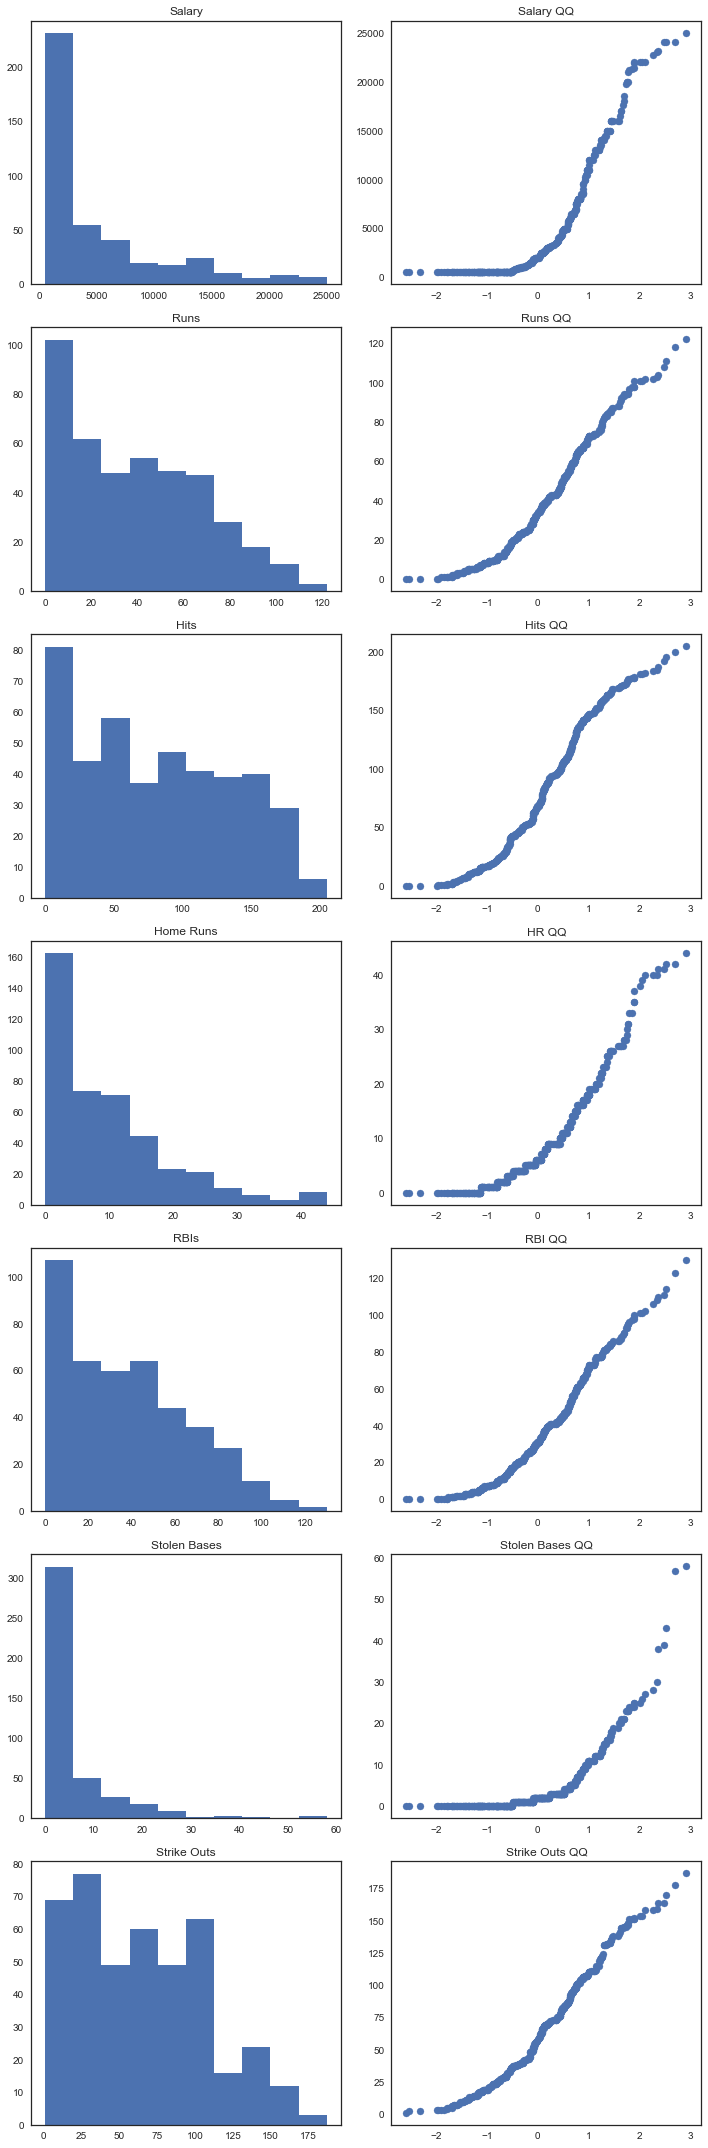

In [55]:
#I want to understand the distribtions of my continuous variables with histograms and qq plots
f,ax = plt.subplots(figsize=(10,30))
norm= sorted(np.random.normal(0, 1, 422))

plt.subplot(7, 2, 1)
plt.hist(df_3['salary'])
plt.title("Salary")

plt.subplot(7, 2, 2)
plt.scatter(norm, sorted(df_3.salary))
plt.title("Salary QQ")

plt.subplot(7, 2, 3)
plt.hist(df_3['R'])
plt.title("Runs")

plt.subplot(7, 2, 4)
plt.scatter(norm, sorted(df_3.R))
plt.title("Runs QQ")

plt.subplot(7, 2, 5)
plt.hist(df_3['H'])
plt.title("Hits")

plt.subplot(7, 2, 6)
plt.scatter(norm, sorted(df_3.H))
plt.title("Hits QQ")

plt.subplot(7, 2, 7)
plt.hist(df_3['HR'])
plt.title("Home Runs")

plt.subplot(7, 2, 8)
plt.scatter(norm, sorted(df_3.HR))
plt.title("HR QQ")

plt.subplot(7, 2, 9)
plt.hist(df_3['RBI'])
plt.title("RBIs")

plt.subplot(7, 2, 10)
plt.scatter(norm, sorted(df_3.RBI))
plt.title("RBI QQ")

plt.subplot(7, 2, 11)
plt.hist(df_3['SB'])
plt.title("Stolen Bases")

plt.subplot(7, 2, 12)
plt.scatter(norm, sorted(df_3.SB))
plt.title("Stolen Bases QQ")

plt.subplot(7, 2, 13)
plt.hist(df_3['SO'])
plt.title("Strike Outs")

plt.subplot(7, 2, 14)
plt.scatter(norm, sorted(df_3.SO))
plt.title("Strike Outs QQ")


plt.tight_layout()
plt.show()


There is clearly some (right) skew in many of these distributions. The QQ plots show that these distributions, are likely non-normal. 

In [56]:
#make another subset of just my continuous variables for correlation analysis
continuous = df_3.loc[:, ['salary','R','H','HR','RBI','SB','SO']]

In [57]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")
#create a dataframe of random noise

In [58]:
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(continuous.shape)),
    columns=continuous.columns)

C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


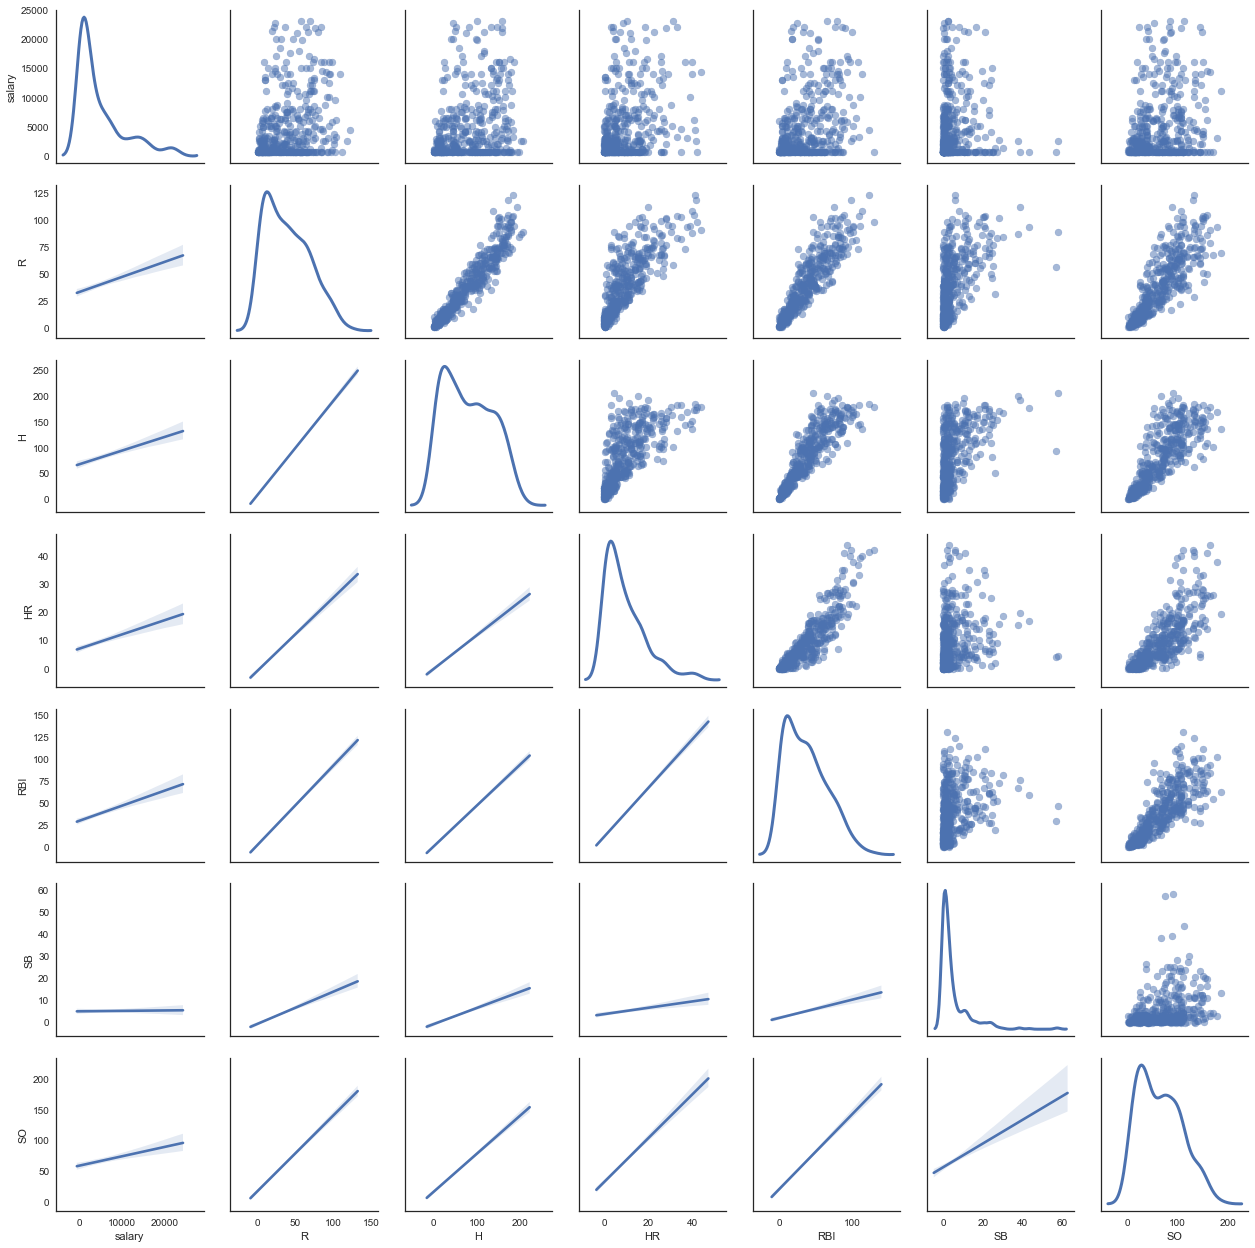

In [59]:
# Combine the data and the noise.
continuous = continuous.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(continuous.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

          salary         R         H        HR       RBI        SB        SO
salary  1.000000  0.273568  0.269978  0.304530  0.336571  0.013907  0.201790
R       0.273568  1.000000  0.949048  0.798710  0.903792  0.531884  0.832446
H       0.269978  0.949048  1.000000  0.707756  0.895763  0.513496  0.804562
HR      0.304530  0.798710  0.707756  1.000000  0.894856  0.169149  0.777293
RBI     0.336571  0.903792  0.895763  0.894856  1.000000  0.298873  0.816405
SB      0.013907  0.531884  0.513496  0.169149  0.298873  1.000000  0.355764
SO      0.201790  0.832446  0.804562  0.777293  0.816405  0.355764  1.000000


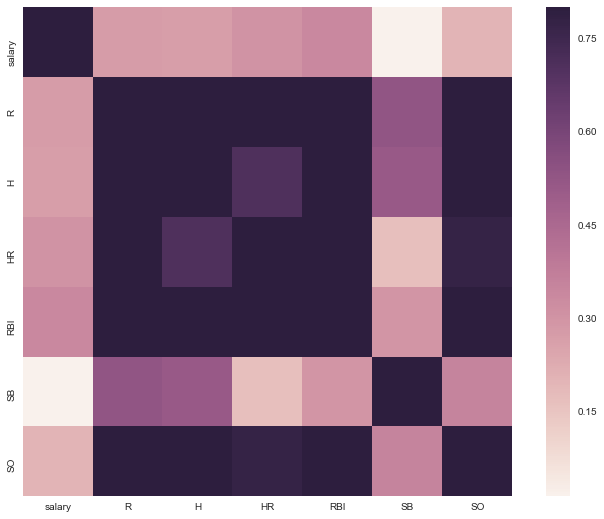

In [60]:
# Make the correlation matrix.
corrmat = continuous.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


There is a high level of correlation between a lot of my variables. Stolen bases seems to be one of the few variables (besides my outcome variable, salary) that has lower correlation with the other variables. Stolen Bases also has a very low correlation with Salary.

#### Examining Continuous and Catgorical

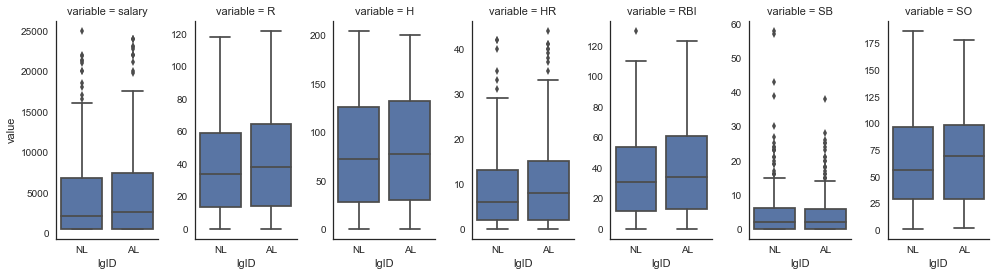

          H                                                            HR  \
      count       mean        std  min    25%   50%     75%    max  count   
lgID                                                                        
AL    210.0  81.895238  56.025955  0.0  29.50  77.5  131.75  200.0  210.0   
NL    212.0  79.037736  54.383215  0.0  27.75  72.5  126.25  205.0  212.0   

                  ...        SO        salary                            \
           mean   ...       75%    max  count         mean          std   
lgID              ...                                                     
AL    10.247619   ...     98.00  178.0  210.0  5236.947190  6112.074234   
NL     8.849057   ...     96.25  187.0  212.0  4716.967783  5643.997683   

                                                 
        min      25%     50%       75%      max  
lgID                                             
AL    507.5  528.500  2620.0  7375.000  24000.0  
NL    507.5  524.375  2100.0  6776.785

In [61]:
# Plot all the variables with boxplots for each league .drop my other categorical, team 

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_3
df_long = pd.melt(df_long, id_vars=['lgID'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, "lgID", "value")
plt.show()

# Descriptive statistics by group.
print(df_3.groupby('lgID').describe())

# Test whether group differences are significant.
for col in df_3.loc[:,['salary','R','H','HR','RBI','SB','SO']].columns:
    print(col)
    print(stats.ttest_ind(
        df_3[df_3['lgID'] == 'NL'][col].dropna(),
        df_3[df_3['lgID'] == 'AL'][col].dropna()
    ))

There are clearly outliers in each variable, which I will want to deal with in feature selection. Also, looking at the QQ plots and histograms, there is likely non-normality in the distributions of each of my continuous variables. I will also want to address this with feature selection. 

Based on t test, there is no significant difference between each var and the league. 

## Feature Selection

In [62]:
#for team name, I am going to turn my league into indicator vars
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df_3['lgID']) #Convert categorical variable into dummy/indicator variables



In [90]:
# #don't forget to add salary to features data frame
features['salary'] =df_3['salary']

In [63]:
#high end of HR (above 3rd quartile, 15)
features['High_HR'] = np.where(df_3.HR>=15,1,0)
# low end o stolen bases (below or equal to median, 2)
features['High_SB'] = np.where(df_3.SB<=2,1,0)

In [64]:
#Runs per hits
features['R_div_H'] = df_3['R']/df_3['H']

In [65]:
#feature for highest correlated variables (Runs and Hits)
means = df_3[['H','R']].mean(axis=0)
stds = df_3[['H','R']].std(axis=0)
features['H_R_avg'] = ((df_3[['H','R']]-means)/stds).mean(axis=1)



In [32]:
plotdf = df_3.loc[:, ['H', 'R']]
plotdf['H_R_avg'] = features['H_R_avg'] 
corrmat2 = plotdf.corr()
print(corrmat2)

                H         R   H_R_avg
H        1.000000  0.949464  0.987285
R        0.949464  1.000000  0.987285
H_R_avg  0.987285  0.987285  1.000000


C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


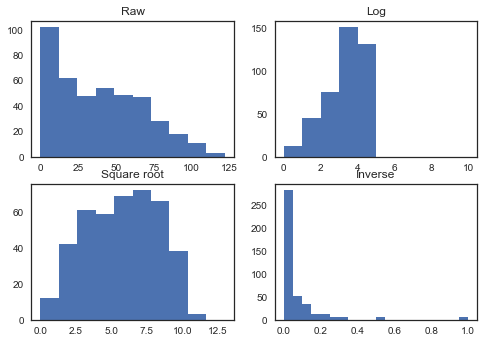

In [66]:
#nonnormality
# Check dist for Runs first
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_3['R'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_3['R'].dropna()),range =(0,10))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_3['R'].dropna()),range =(0,13))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df_3['R'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()



In [67]:
# Square Root seems to have the most normal looking distribution for Runs, so lets make this a feature
features['sqrt_runs'] = np.sqrt(df_3['R'])

C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


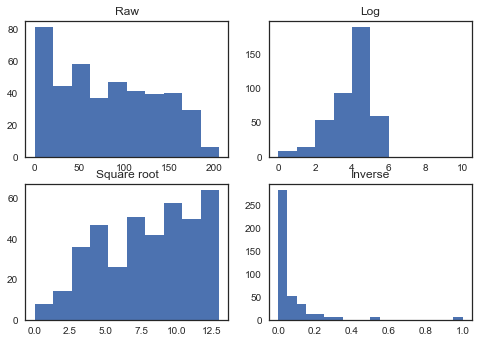

In [68]:
#nonnormality
# Check dist for Hits
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_3['H'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_3['H'].dropna()),range =(0,10))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_3['H'].dropna()),range =(0,13))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df_3['R'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()



In [69]:
#going to take the Log of Runs. Still skew to distrivution, but most normal 
features['log_hits'] = np.log(df_3['H'])

#to deal with inf. can i do this?
# features.replace([np.inf, -np.inf], np.nan)

C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


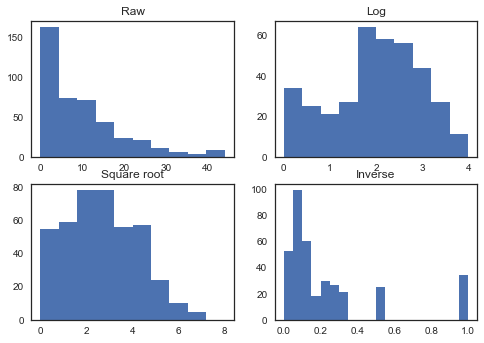

In [70]:
#nonnormality
# Check dist for HR
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_3['HR'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_3['HR'].dropna()),range =(0,4))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_3['HR'].dropna()),range =(0,8))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df_3['HR'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()


In [71]:
#going to take the sqrt of HR. Still skew to distrivution, but most normal 
features['sqrt_HR'] = np.sqrt(df_3['HR'])

C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


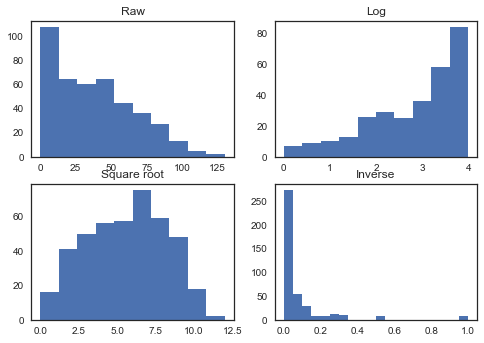

In [72]:
#nonnormality
# Check dist for rbi
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_3['RBI'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_3['RBI'].dropna()),range =(0,4))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_3['RBI'].dropna()),range =(0,12))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df_3['RBI'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()


In [73]:
#going to take the sqrt of rbi. Still skew to distrivution, but most normal 
features['sqrt_RBI'] = np.sqrt(df_3['RBI'])

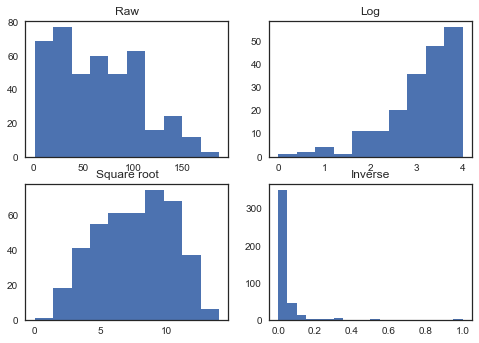

In [74]:
#nonnormality
# Check dist for Strikeouts
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_3['SO'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_3['SO'].dropna()),range =(0,4))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_3['SO'].dropna()),range =(0,14))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df_3['SO'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()


In [75]:
#going to take the sqrt of SO. Still skew to distrivution, but most normal 
features['sqrt_SO'] = np.sqrt(df_3['SO'])

In [76]:
#PCA of highly correlated cariables ( all but stolen bases)
df_pca = df_3.loc[:,['R','H','HR','RBI','SO']].dropna()

In [77]:
X = StandardScaler().fit_transform(df_pca)


In [78]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.0023753   0.95171923  0.8012617   0.90617632  0.83158918]
 [ 0.95171923  1.0023753   0.71076487  0.89846744  0.8030303 ]
 [ 0.8012617   0.71076487  1.0023753   0.89804567  0.77191497]
 [ 0.90617632  0.89846744  0.89804567  1.0023753   0.81468064]
 [ 0.83158918  0.8030303   0.77191497  0.81468064  1.0023753 ]]


In [79]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.46146288]
 [ 0.44877713]
 [ 0.42836538]
 [ 0.4638656 ]
 [ 0.4324152 ]]
Eigenvalue 1: 4.3618620316970995
----------------------------------------
Eigenvector 2: 
[[-0.44518956]
 [ 0.63788773]
 [ 0.3837143 ]
 [-0.49646799]
 [-0.03447258]]
Eigenvalue 2: 0.02303734253787075
----------------------------------------
Eigenvector 3: 
[[ 0.68414291]
 [-0.1880721 ]
 [ 0.25897874]
 [-0.6482963 ]
 [-0.09601714]]
Eigenvalue 3: 0.06865275075441275
----------------------------------------
Eigenvector 4: 
[[ 0.30531437]
 [ 0.55823698]
 [-0.75819763]
 [-0.14244054]
 [-0.00128661]]
Eigenvalue 4: 0.3264292688757629
----------------------------------------
Eigenvector 5: 
[[-0.16610204]
 [-0.21142065]
 [-0.16532633]
 [-0.31268329]
 [ 0.8958838 ]]
Eigenvalue 5: 0.23189509069541892
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [ 0.87030517  0.00459655  0.01369801  0.06513115  0.04626912]


I am going to want to use 1 component, of EVec 1, as it has the highest EVal. The solution will accompass 87% of the variance in the data.

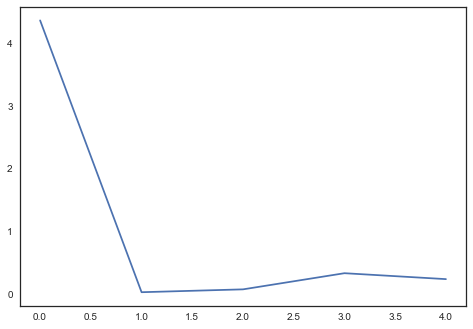

In [80]:
plt.plot(eig_val_cov)
plt.show()

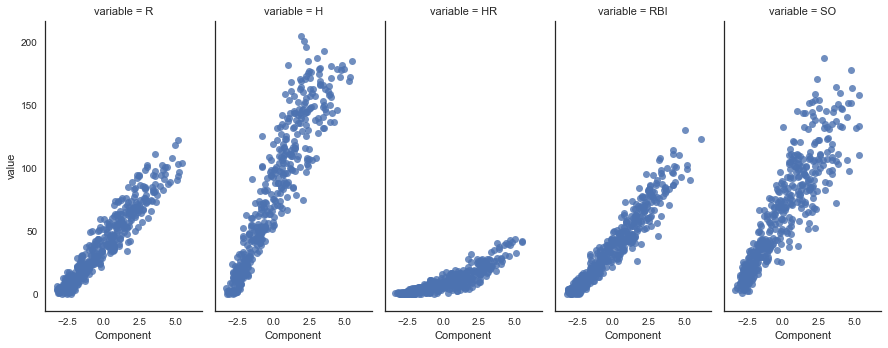

In [81]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['R','H','HR','RBI','SO']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=5, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [ ]:
#my component has a strong liner relationship with my original vars (less strong with HR)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.87030517]


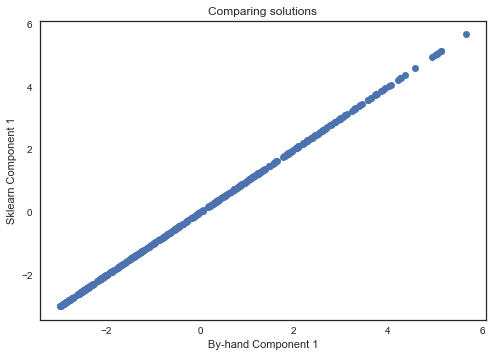

In [82]:
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [83]:
features['pca_comp_1'] = Y_sklearn

In [84]:
features

,AL,NL,High_HR,High_SB,R_div_H,H_R_avg,sqrt_runs,log_hits,sqrt_HR,sqrt_RBI,sqrt_SO,pca_comp_1
0,0,1,0,1,0.516129,-0.859695,4.000000,3.433987,1.414214,3.464102,5.744563,-1.876805
1,0,1,0,1,0.000000,-1.410360,0.000000,0.000000,0.000000,0.000000,2.645751,-2.928570
2,0,1,0,1,0.684211,-1.020731,3.605551,2.944439,0.000000,2.000000,4.123106,-2.406059
3,0,1,0,1,0.652174,-0.949632,3.872983,3.135494,1.000000,2.645751,6.324555,-2.012612
4,0,1,0,1,0.153846,-1.266744,1.414214,2.564949,0.000000,1.414214,2.236068,-2.786801
5,0,1,0,1,0.850000,-0.941985,4.123106,2.995732,1.732051,3.605551,3.316625,-2.113457
6,1,0,0,1,0.301887,0.098877,5.656854,4.663439,2.645751,6.403124,9.486833,0.268457
7,0,1,0,0,0.436508,0.680840,7.416198,4.836282,2.449490,7.211103,10.954451,1.239961
8,0,1,0,1,0.488889,-0.628268,4.690416,3.806662,2.000000,4.000000,5.830952,-1.500662
9,0,1,0,1,0.416667,-1.223547,2.236068,2.484907,1.000000,2.000000,3.741657,-2.577088


In [88]:
 features = features.replace([np.inf, -np.inf], np.nan).dropna(how ='all')


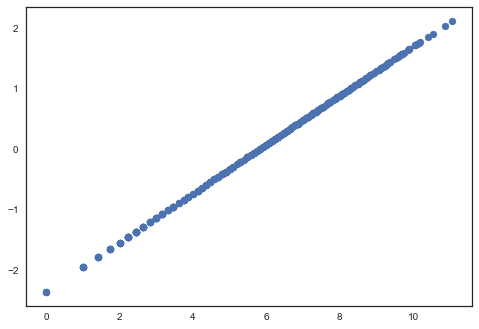

                 AL            NL       High_HR       High_SB       R_div_H  \
count  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02   
mean   2.021243e-16 -1.115535e-17 -6.108883e-16 -5.046468e-18  2.876487e-16   
std    1.001198e+00  1.001198e+00  1.001198e+00  1.001198e+00  1.001198e+00   
min   -9.952267e-01 -1.004796e+00 -5.902433e-01 -1.149879e+00 -2.120141e+00   
25%   -9.952267e-01 -1.004796e+00 -5.902433e-01 -1.149879e+00 -4.232343e-01   
50%   -9.952267e-01  9.952267e-01 -5.902433e-01  8.696566e-01 -1.044267e-01   
75%    1.004796e+00  9.952267e-01  1.694217e+00  8.696566e-01  2.096360e-01   
max    1.004796e+00  9.952267e-01  1.694217e+00  8.696566e-01  1.024304e+01   

            H_R_avg     sqrt_runs      log_hits       sqrt_HR      sqrt_RBI  \
count  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02   
mean  -1.030542e-16 -7.197857e-17  1.646742e-16  1.131471e-16  4.988036e-16   
std    1.001198e+00  1.001198e+00  1.001198e+00  1.

In [89]:
features = features.dropna()
# Select only numeric variables to scale.
df_num = features.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['sqrt_runs'], df_scaled['sqrt_runs'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

## Select best features 

                  AL        NL   High_HR   High_SB   R_div_H   H_R_avg  \
AL          1.000000 -1.000000  0.079338  0.015165  0.037423  0.039550   
NL         -1.000000  1.000000 -0.079338 -0.015165 -0.037423 -0.039550   
High_HR     0.079338 -0.079338  1.000000 -0.204109  0.045571  0.617404   
High_SB     0.015165 -0.015165 -0.204109  1.000000 -0.042675 -0.494422   
R_div_H     0.037423 -0.037423  0.045571 -0.042675  1.000000 -0.064744   
H_R_avg     0.039550 -0.039550  0.617404 -0.494422 -0.064744  1.000000   
sqrt_runs   0.051795 -0.051795  0.604704 -0.508028 -0.005220  0.973549   
log_hits    0.031019 -0.031019  0.468124 -0.440918 -0.290691  0.866875   
sqrt_HR     0.058370 -0.058370  0.755552 -0.280821 -0.023235  0.801516   
sqrt_RBI    0.042961 -0.042961  0.678371 -0.367941 -0.135422  0.915328   
sqrt_SO     0.046334 -0.046334  0.596859 -0.411415 -0.078297  0.837823   
pca_comp_1  0.052913 -0.052913  0.733118 -0.425815 -0.044744  0.960894   
salary      0.045049 -0.045049  0.2562

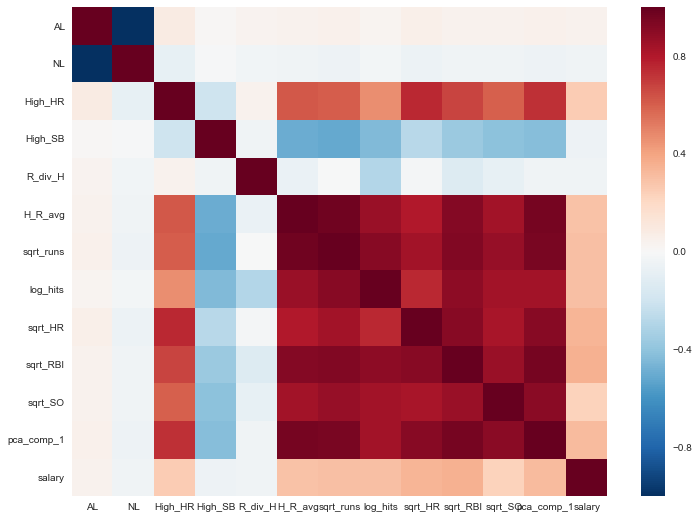

In [93]:
#lets apply simple filtering method
#some criteria to make a design 
#1 criteria could be, features that have good amount of variablility
#rank features by variance and pick top 5

#or we can look at correlation with target variable
#correlation of each indivdual var with target
 
corrmat = features.corr()
print(corrmat)

f,ax = plt.subplots(figsize =(12,9))


sns.heatmap(corrmat)
plt.show()


In [102]:
corrmat = features.corr()
print(corrmat.salary.abs().sort_values(ascending=False).iloc[1:6])

#salary attribute of corrmat and abs attrivute of salary and sort_values is an attrbiute of whatever the abs function returns


sqrt_RBI      0.353393
sqrt_HR       0.336334
pca_comp_1    0.319344
sqrt_runs     0.302226
log_hits      0.297152
Name: salary, dtype: float64
